In [104]:

# Import our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.cluster import DBSCAN

# Import PCA.
from sklearn.decomposition import PCA

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [79]:
# read in data frame
sf_dev_projs = pd.read_csv('./data/five_yr_pipeline.csv', low_memory = False)

In [80]:
sf_dev_projs

,landuse,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,pipelineunits,...,heightbul,pda,longitude,latitude,year,qtr,yearqtr,latlong,currentpolicedistricts,affordable
0,Resident,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,None applied,0.0,1.0,1.0,...,40-X,Richmond Corridors,-122.508817,37.772600,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,0.0
1,Vacant,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,None applied,0.0,0.0,0.0,...,270-CS,Eastern Neighborhoods,-122.400848,37.776946,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),1.0,0.0
2,Resident,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,Bayview/Southeast Neighborhoods,-122.388080,37.718621,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),2.0,0.0
3,Resident,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,J Church and Mission Corridor,-122.433855,37.736508,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),9.0,0.0
4,Resident,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,0,-122.441421,37.735635,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43197,Resident,964 - 966 OAK ST,True,BP FILED,02/09/2017 12:00:00 AM,2.0,None applied,0.0,0.0,1.0,...,Unknown,Rest of the City,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7736998606, -122.43522293)",4.0,0.0
43198,Unknown,505 26TH AVE,False,PL FILED,02/01/2018 12:00:00 AM,3.0,None applied,0.0,3.0,1.0,...,Unknown,Rest of the City,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7797312955, -122.485978127)",8.0,0.0
43199,Unknown,2808 FOLSOM ST,False,PL FILED,03/16/2018 12:00:00 AM,2.0,None applied,0.0,2.0,1.0,...,Unknown,Eastern Neighborhoods,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7521940241, -122.414253165)",3.0,0.0
43200,CIE,327 CAPITOL AV,True,CONSTRUCTION,03/08/2018 12:00:00 AM,0.0,None applied,0.0,0.0,0.0,...,Unknown,Rest of the City,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7135532116, -122.459302748)",10.0,0.0


In [81]:
sf_dev_projs.dtypes

landuse                    object
nameaddr                   object
entitled                   object
beststat                   object
bestdate                   object
units                     float64
tcocfcdate                 object
tcocfcunits               float64
unitsnet                  float64
pipelineunits             float64
affordablenet             float64
afftarget                  object
totalgsf                  float64
netgsf                    float64
cieexist                  float64
cie                       float64
cienet                    float64
medexist                  float64
med                       float64
mednet                    float64
mipsexist                 float64
mips                      float64
mipsnet                   float64
pdrexist                  float64
pdr                       float64
pdrnet                    float64
retexist                  float64
ret                       float64
retnet                    float64
visitexist    

In [82]:
sf_dev_projs.drop_duplicates(subset = 'nameaddr', inplace = True)

In [83]:
sf_dev_projs.drop(columns = ['tcocfcdate', 
                             'year', 
                             'qtr', 
                             'yearqtr', 
                             'nameaddr', 
                             'bestdate', 
                             'pd', 
                             'nhood41',
                             'zoning', 
                             'heightbul',
                             'pda',
                             'latlong',
                             'currentpolicedistricts'
                            ], 
                  inplace = True)

In [84]:
sf_dev_projs.isnull().sum()

landuse             0
entitled            0
beststat            0
units               0
tcocfcunits         0
unitsnet            0
pipelineunits       0
affordablenet       0
afftarget           0
totalgsf            0
netgsf              0
cieexist            0
cie                 0
cienet              0
medexist            0
med                 0
mednet              0
mipsexist           0
mips                0
mipsnet             0
pdrexist            0
pdr                 0
pdrnet              0
retexist            0
ret                 0
retnet              0
visitexist          0
visit               0
visitnet            0
hotelroomexist      0
hotelroomprop       0
hotelroomnet        0
legalization        0
adu                 0
sd22                0
longitude         215
latitude          215
affordable          0
dtype: int64

In [85]:
sf_dev_projs.dropna(inplace = True)

In [86]:
sf_dev_projs = pd.get_dummies(sf_dev_projs).astype(int)

In [87]:
sf_dev_projs

,units,tcocfcunits,unitsnet,pipelineunits,affordablenet,totalgsf,netgsf,cieexist,cie,cienet,...,beststat_BP ISSUED,beststat_BP REINSTATED,beststat_CONSTRUCTION,beststat_PL APPROVED,beststat_PL FILED,afftarget_Extremely Very Low Income,afftarget_Low Income,afftarget_Moderate Income,afftarget_No Affordable Housing,afftarget_Very Low Income
0,2,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41248,0,0,0,0,0,11287,9248,0,4624,4624,...,1,0,0,0,0,0,0,0,1,0
41317,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
41321,0,0,0,0,0,6500,5569,0,0,0,...,1,0,0,0,0,0,0,0,1,0
41341,1,0,-1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [88]:
# Define X
X = sf_dev_projs

In [89]:
# There's a VERY important step before fitting our K-Means Model. Any ideas?
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [92]:
inertia_list =[]

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

/Users/josephnotaro/anaconda3/envs/sktimeenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josephnotaro/anaconda3/envs/sktimeenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josephnotaro/anaconda3/envs/sktimeenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josephnotaro/anaconda3/envs/sktimeenv/lib/python3.9/site-packages/sklearn/clus

[224258.99999999997,
 208227.91521017725,
 196226.1775798829,
 187054.60268121783,
 174999.2165868976,
 166285.27154792036,
 161337.86147622656,
 155214.87977286626,
 150502.16346696508,
 145643.96367717697,
 140268.06336465335,
 134325.34740120269,
 131046.62019232119,
 126343.07640789286,
 121173.01507743064,
 116958.0300989802,
 113905.70637849854,
 109026.90523011971,
 106878.01561903999,
 100960.19915125816]

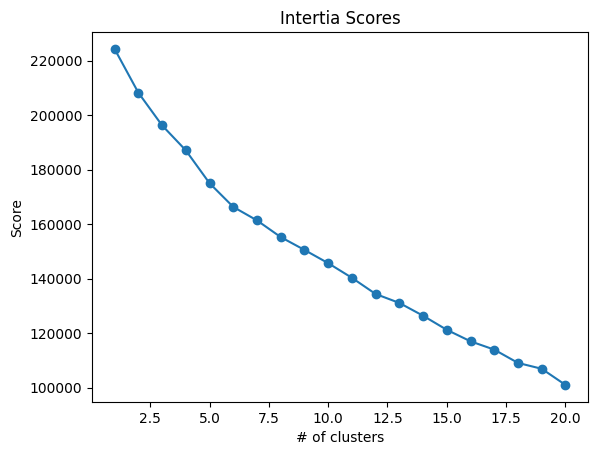

In [94]:
plt.plot(range(1, 21), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Score')
plt.title('Intertia Scores');

In [95]:

# Instantiate our StandardScaler.
ss = StandardScaler()

# Standardize X_train.
X_train = ss.fit_transform(X_train)

# Standardize X_test.
X_test = ss.transform(X_test)

In [98]:
# Instantiate PCA.
pca = PCA(random_state = 42, standardize = False)

TypeError: __init__() got an unexpected keyword argument 'standardize'

In [97]:
# Fit PCA on the training data.
pca.fit(X_train)

LinAlgError: SVD did not converge

In [ ]:
# Transform PCA on the training data.
Z_train = pca.transform(X_train)

In [100]:
sf_dev_projs

,units,tcocfcunits,unitsnet,pipelineunits,affordablenet,totalgsf,netgsf,cieexist,cie,cienet,...,beststat_BP ISSUED,beststat_BP REINSTATED,beststat_CONSTRUCTION,beststat_PL APPROVED,beststat_PL FILED,afftarget_Extremely Very Low Income,afftarget_Low Income,afftarget_Moderate Income,afftarget_No Affordable Housing,afftarget_Very Low Income
0,2,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41248,0,0,0,0,0,11287,9248,0,4624,4624,...,1,0,0,0,0,0,0,0,1,0
41317,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
41321,0,0,0,0,0,6500,5569,0,0,0,...,1,0,0,0,0,0,0,0,1,0
41341,1,0,-1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [102]:
ss = StandardScaler()

X_scaled = ss.fit_transform(sf_dev_projs)

In [105]:
dbscan = DBSCAN()

dbscan.fit(X_scaled);

In [106]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1])

In [107]:
silhouette_score(X_scaled, dbscan.labels_)

0.32945333169086344

In [109]:
sf_dev_projs['cluster'] = dbscan.labels_

In [111]:
sf_dev_projs['cluster'].value_counts()

cluster
-1     886
 0     454
 7     351
 14    346
 9     228
      ... 
 38      5
 39      5
 59      5
 42      5
 48      5
Name: count, Length: 76, dtype: int64

In [124]:
dbscan = DBSCAN(eps = 5, min_samples = 100)

dbscan.fit(X_scaled)

pd.Series(dbscan.labels_).unique()

array([ 0, -1])

In [125]:
silhouette_score(X_scaled, dbscan.labels_)

0.3657568949692147

In [23]:
sf_dev_projs

,landuse,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,pipelineunits,...,heightbul,pda,longitude,latitude,year,qtr,yearqtr,latlong,currentpolicedistricts,affordable
0,Resident,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,None applied,0.0,1.0,1.0,...,40-X,Richmond Corridors,-122.508817,37.772600,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,0.0
1,Vacant,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,None applied,0.0,0.0,0.0,...,270-CS,Eastern Neighborhoods,-122.400848,37.776946,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),1.0,0.0
2,Resident,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,Bayview/Southeast Neighborhoods,-122.388080,37.718621,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),2.0,0.0
3,Resident,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,J Church and Mission Corridor,-122.433855,37.736508,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),9.0,0.0
4,Resident,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,0,-122.441421,37.735635,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43184,Resident,81 NOE ST,True,BP APPROVED,10/01/2012 12:00:00 AM,3.0,None applied,0.0,1.0,1.0,...,Unknown,Market & Octavia,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7678968336, -122.433131537)",7.0,0.0
43188,Unknown,4534 MISSION ST,False,PL FILED,03/08/2018 12:00:00 AM,4.0,None applied,0.0,4.0,1.0,...,Unknown,Mission-San Jose Corridor,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7254518373, -122.434584771)",9.0,0.0
43194,Unknown,936 HOLLISTER AVE,False,PL FILED,03/20/2018 12:00:00 AM,1.0,None applied,0.0,1.0,1.0,...,Unknown,Bayview/Hunters Point Shipyard/Candlestick Point,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7185382776, -122.389810395)",2.0,0.0
43198,Unknown,505 26TH AVE,False,PL FILED,02/01/2018 12:00:00 AM,3.0,None applied,0.0,3.0,1.0,...,Unknown,Rest of the City,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7797312955, -122.485978127)",8.0,0.0


In [24]:
sf_dev_projs.drop(columns = ['tcocfcdate', 'year', 'qtr', 'yearqtr', 'nameaddr'], inplace = True)

In [25]:
sf_dev_projs

,landuse,entitled,beststat,bestdate,units,tcocfcunits,unitsnet,pipelineunits,affordablenet,afftarget,...,sd22,nhood41,zoning,heightbul,pda,longitude,latitude,latlong,currentpolicedistricts,affordable
0,Resident,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,0.0,1.0,1.0,0.0,No Affordable Housing,...,1.0,Outer Richmond,RH-2,40-X,Richmond Corridors,-122.508817,37.772600,POINT (-122.5088171 37.7725997),8.0,0.0
1,Vacant,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,0.0,0.0,0.0,0.0,No Affordable Housing,...,6.0,South of Market,MUG,270-CS,Eastern Neighborhoods,-122.400848,37.776946,POINT (-122.400848374 37.7769458793),1.0,0.0
2,Resident,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,0.0,1.0,1.0,0.0,No Affordable Housing,...,10.0,Bayview Hunters Point,RH-1,40-X,Bayview/Southeast Neighborhoods,-122.388080,37.718621,POINT (-122.388080214 37.7186214874),2.0,0.0
3,Resident,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,0.0,1.0,1.0,0.0,No Affordable Housing,...,8.0,Glen Park,RH-1,40-X,J Church and Mission Corridor,-122.433855,37.736508,POINT (-122.433855046 37.7365078557),9.0,0.0
4,Resident,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,0.0,1.0,1.0,0.0,No Affordable Housing,...,7.0,West of Twin Peaks,RH-1,40-X,0,-122.441421,37.735635,POINT (-122.441420855 37.7356345978),9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43184,Resident,True,BP APPROVED,10/01/2012 12:00:00 AM,3.0,0.0,1.0,1.0,0.0,No Affordable Housing,...,8.0,Unknown,Unknown,Unknown,Market & Octavia,NaN,NaN,"(37.7678968336, -122.433131537)",7.0,0.0
43188,Unknown,False,PL FILED,03/08/2018 12:00:00 AM,4.0,0.0,4.0,1.0,0.0,No Affordable Housing,...,11.0,Unknown,Unknown,Unknown,Mission-San Jose Corridor,NaN,NaN,"(37.7254518373, -122.434584771)",9.0,0.0
43194,Unknown,False,PL FILED,03/20/2018 12:00:00 AM,1.0,0.0,1.0,1.0,0.0,No Affordable Housing,...,10.0,Unknown,Unknown,Unknown,Bayview/Hunters Point Shipyard/Candlestick Point,NaN,NaN,"(37.7185382776, -122.389810395)",2.0,0.0
43198,Unknown,False,PL FILED,02/01/2018 12:00:00 AM,3.0,0.0,3.0,1.0,0.0,No Affordable Housing,...,1.0,Unknown,Unknown,Unknown,Rest of the City,NaN,NaN,"(37.7797312955, -122.485978127)",8.0,0.0


In [26]:
sf_dev_projs.isnull().sum()

landuse                     0
entitled                    0
beststat                    0
bestdate                    8
units                       0
tcocfcunits                 0
unitsnet                    0
pipelineunits               0
affordablenet               0
afftarget                   0
totalgsf                    0
netgsf                      0
cieexist                    0
cie                         0
cienet                      0
medexist                    0
med                         0
mednet                      0
mipsexist                   0
mips                        0
mipsnet                     0
pdrexist                    0
pdr                         0
pdrnet                      0
retexist                    0
ret                         0
retnet                      0
visitexist                  0
visit                       0
visitnet                    0
hotelroomexist              0
hotelroomprop               0
hotelroomnet                0
legalizati

In [27]:
sf_dev_projs.dropna(inplace = True)

In [58]:
sf_dev_projs = pd.get_dummies(sf_dev_projs).astype(int)

In [59]:
sf_dev_projs

,units,tcocfcunits,unitsnet,pipelineunits,affordablenet,totalgsf,netgsf,cieexist,cie,cienet,...,currentpolicedistricts_10.0,currentpolicedistricts_2.0,currentpolicedistricts_3.0,currentpolicedistricts_4.0,currentpolicedistricts_5.0,currentpolicedistricts_6.0,currentpolicedistricts_7.0,currentpolicedistricts_8.0,currentpolicedistricts_9.0,currentpolicedistricts_Unknown
0,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41248,0,0,0,0,0,11287,9248,0,4624,4624,...,0,0,0,0,0,0,0,0,1,0
41317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41321,0,0,0,0,0,6500,5569,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41341,1,0,-1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [60]:
# Define X
X = sf_dev_projs

In [61]:
# There's a VERY important step before fitting our K-Means Model. Any ideas?
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [62]:
inertia_list =[]

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

/Users/josephnotaro/anaconda3/envs/sktimeenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josephnotaro/anaconda3/envs/sktimeenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josephnotaro/anaconda3/envs/sktimeenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josephnotaro/anaconda3/envs/sktimeenv/lib/python3.9/site-packages/sklearn/clus

[24445884.99999965,
 24433277.157921612,
 24426151.412898082,
 24398710.972180422,
 24395267.459434353,
 24376386.37305936,
 24377614.515391104,
 24352557.56167364,
 24347433.520600922,
 24339811.242194507]

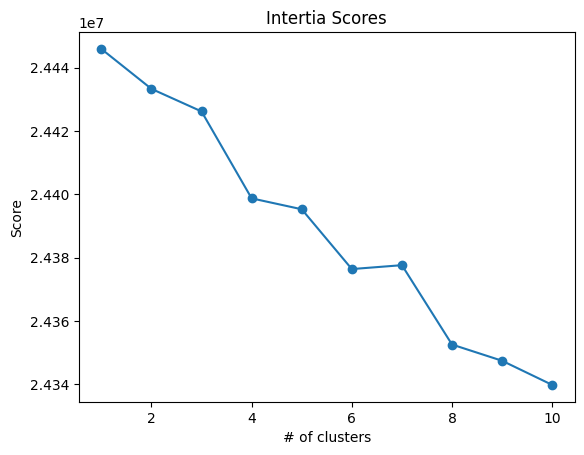

In [63]:
plt.plot(range(1, 11), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Score')
plt.title('Intertia Scores');

In [64]:
sf_dev_projs

,units,tcocfcunits,unitsnet,pipelineunits,affordablenet,totalgsf,netgsf,cieexist,cie,cienet,...,currentpolicedistricts_10.0,currentpolicedistricts_2.0,currentpolicedistricts_3.0,currentpolicedistricts_4.0,currentpolicedistricts_5.0,currentpolicedistricts_6.0,currentpolicedistricts_7.0,currentpolicedistricts_8.0,currentpolicedistricts_9.0,currentpolicedistricts_Unknown
0,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41248,0,0,0,0,0,11287,9248,0,4624,4624,...,0,0,0,0,0,0,0,0,1,0
41317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41321,0,0,0,0,0,6500,5569,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41341,1,0,-1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [65]:
X

,units,tcocfcunits,unitsnet,pipelineunits,affordablenet,totalgsf,netgsf,cieexist,cie,cienet,...,currentpolicedistricts_10.0,currentpolicedistricts_2.0,currentpolicedistricts_3.0,currentpolicedistricts_4.0,currentpolicedistricts_5.0,currentpolicedistricts_6.0,currentpolicedistricts_7.0,currentpolicedistricts_8.0,currentpolicedistricts_9.0,currentpolicedistricts_Unknown
0,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41248,0,0,0,0,0,11287,9248,0,4624,4624,...,0,0,0,0,0,0,0,0,1,0
41317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41321,0,0,0,0,0,6500,5569,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41341,1,0,-1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [66]:
X

,units,tcocfcunits,unitsnet,pipelineunits,affordablenet,totalgsf,netgsf,cieexist,cie,cienet,...,currentpolicedistricts_10.0,currentpolicedistricts_2.0,currentpolicedistricts_3.0,currentpolicedistricts_4.0,currentpolicedistricts_5.0,currentpolicedistricts_6.0,currentpolicedistricts_7.0,currentpolicedistricts_8.0,currentpolicedistricts_9.0,currentpolicedistricts_Unknown
0,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41248,0,0,0,0,0,11287,9248,0,4624,4624,...,0,0,0,0,0,0,0,0,1,0
41317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41321,0,0,0,0,0,6500,5569,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41341,1,0,-1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [73]:

# Instantiate our StandardScaler.
ss = StandardScaler()

# Standardize X_train.
X_train = ss.fit_transform(X_train)

# Standardize X_test.
X_test = ss.transform(X_test)

In [74]:
# Instantiate PCA.
pca = PCA(random_state = 42)

In [75]:
# Fit PCA on the training data.
pca.fit(X_train)

PCA(random_state=42)

In [ ]:
# Transform PCA on the training data.
Z_train = pca.transform(X_train)